#### K-Means Model (Scratch)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("income.csv")
data.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [3]:
X = data[["Age", "Income($)"]].values

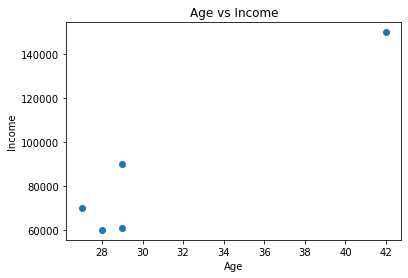

In [4]:
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("Age")
plt.ylabel("Income")
plt.title("Age vs Income")
plt.show()

In [5]:
def distance(point_1, point_2):
    return np.sqrt((point_1[0] - point_2[0])**2 + (point_1[1] - point_2[1])**2)

class KMeansScratch:    
    def train(self, X, K=2, n_iter=100):
        self.centroids = X[np.random.choice(range(X.shape[0]), replace = False, size = K)]
        
        for _ in range(n_iter):
            clusters = [[] for _ in range(K)] 
            
            for point in X:
                distances = [np.linalg.norm(point - centroid) for centroid in self.centroids]
                clusters[np.argmin(distances)].append(point)
            
            self.centroids = np.array([np.mean(cluster, axis=0) for cluster in clusters])

    def predict(self, X):
        result = []

        for point in X:
            distances = [np.linalg.norm(point - centroid) for centroid in self.centroids]            
            result.append(np.argmin(distances))
        
        return result


In [6]:
model = KMeansScratch()
model.train(X, K=3, n_iter=100)

In [7]:
clusters = model.predict(X)

In [8]:
clusters

[0, 2, 0, 0, 1]

In [9]:
model.centroids

array([[2.80000000e+01, 6.36666667e+04],
       [4.20000000e+01, 1.50000000e+05],
       [2.90000000e+01, 9.00000000e+04]])

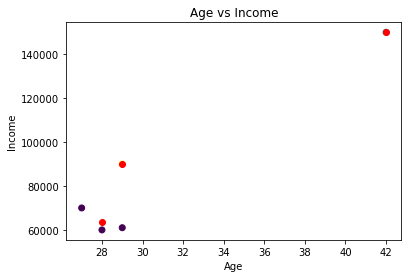

In [10]:
plt.scatter(X[:, 0], X[:, 1], c=clusters)
plt.scatter(model.centroids[:, 0], model.centroids[:, 1], c="red")
plt.xlabel("Age")
plt.ylabel("Income")
plt.title("Age vs Income")
plt.show()

#### K-Mean Model (Scikit Learn)


In [11]:
from sklearn.cluster import KMeans

In [12]:
model = KMeans(n_clusters=3)
model.fit(X)
clusters = model.predict(X)

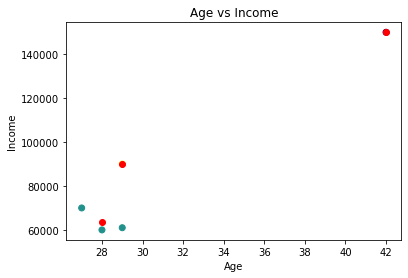

In [13]:
plt.scatter(X[:, 0], X[:, 1], c=clusters)
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], c="red")
plt.xlabel("Age")
plt.ylabel("Income")
plt.title("Age vs Income")
plt.show()